



## 데이터 개수

약학 정보원 21,137개의 데이터 중 자주 사용되는 16,000개 사용.

또 이 중에서 2017 년 10 월 기준으로 의료보험이 적용 되는 알약 **11,151개** 사용

---

## 전처리

### 배경 및 이미지



- 알약의 이미지 배경을 제거 (ResNet 이용, 과정 중에 전경 이미지 손상 가능성 있음, 따라서 전경 이미지의 외곽선 좌표를 추출하여 mask 이미지를 만듬)

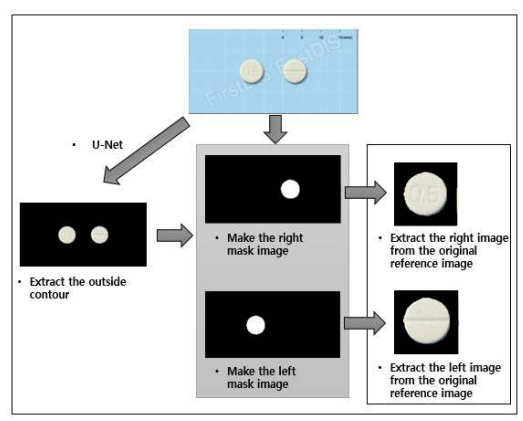


- 앞약 앞면과 뒷면의 영역을 분리하여 각각 저장

- 75 x 75 픽셀의 크기로 조정

- 27개의 모양 중 같은 모양이 5개 이하인 알약들은 하나로 통합하여 모양을 15개로 재분류했음

- 색상의 경우 흰색(38.9%) / 분홍색(15.4%) / 노란색(14.0%)으로 되어 있어, 많은 종류의 색상으로 알약을 분류하는 것이 비효율적이라 생각하여 알약의 색상을 8가지로 분류했음

---

## 모델

### CNN 모델

- Convolution layer 는 ImageNet 으로 미리 학습된 Inception-ResNetV2 모델 사용

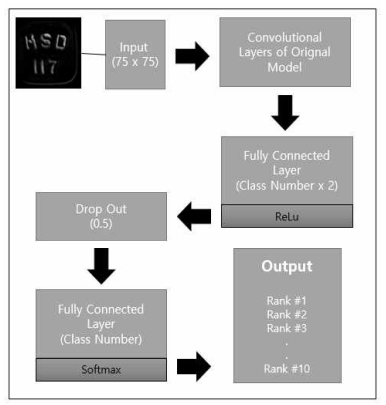

### 모양 식별

- CNN 모델 사용

- 모양 식별을 위해 그림과 같이 이미지 이진화를 하여 진행. 이유는 모양을 식별할 때 알약 색상이나 각인의 영향을 덜 받기 위해

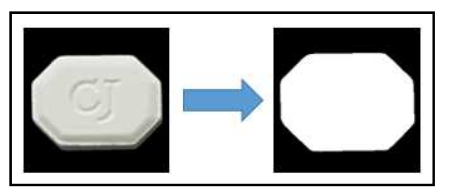

- 이 이미지를 만든 후 CNN 모델 학습 이미지로 사용

### 각인 식별

- CNN 모델 사용

- 알약의 종류당 1개의 참조 이미지를 사용하여 각인 식별에 어려우므로 각인의 특징을 추출하기 위해 사진과 같이 전처리함

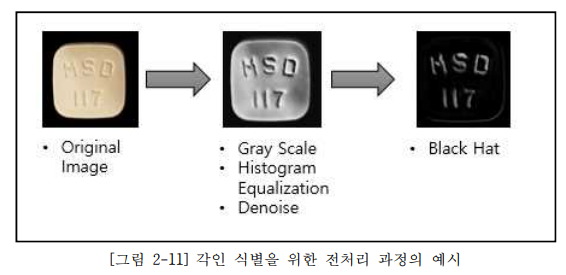

- 히스토그램 균등화(histogram equalization)를 사용하여 각인을 더 뚜렷하게 함

- 각인 주변에 노이즈가 적을 수록 인식률이 높아지기에 Denoise 처리를 적용함

- OpenCV에서 제공하는 Black Hat이라는 형태 변형 기능을 이용하여 각인의 모양을 더욱 돋보이게 함

### 색상 식별

- HSV 색공간을 이용하여 8가지 색상 그룹으로 분류

1. Value의 크기에 따라 작으면 검정 색 계열 / 크면 하얀 색 계열로 분류

2. saturation 과 value 값은 빛 노출과 같은 환경 적인 요인에의해서 변경되는 경향이 있기 때문에 class1 과 class2 는 실험적으로 결정한 값을 기준으로 분류

3. 나머지 6 개 class 는 hue 값을 기준으로 분류

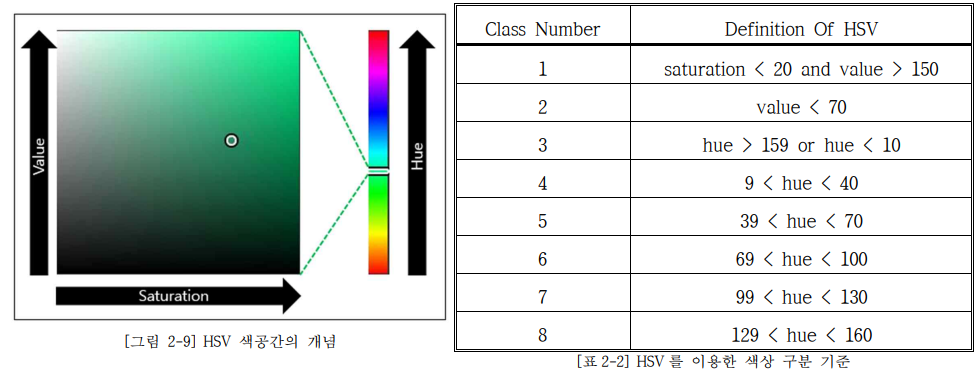


---

### 모델 훈련

- 각 class 당 1,000 개의 이미지를 생성 하였고, 9:1 비율로 학습 데이터와 검증(validation) 데이터로 나누어 사용

- 모양 별로 15 가지 종류로 나누었고, 각 모양 별로 또다시 8 가지의 색상 그룹으로 나누었기에 CNN 모델을 각각 훈련시킴

- 결과적으로 24개의 CNN 모델을 학습시킴

---

### 전체적인 과정

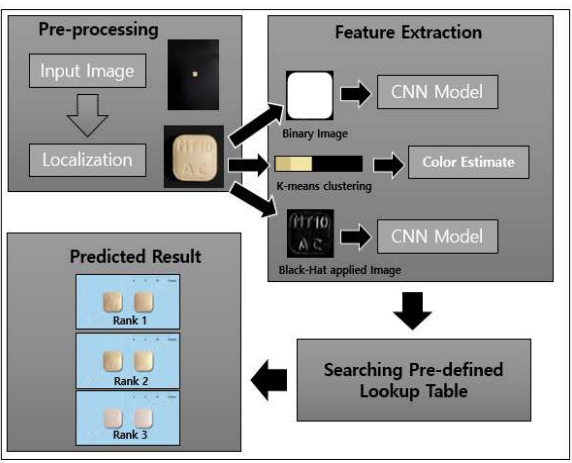


---

### 추가(부록에 관한 내용)

- 조각으로 각인이 그려진 것은 전처리를 진행 해야 OCR로 인식이 가능하다.

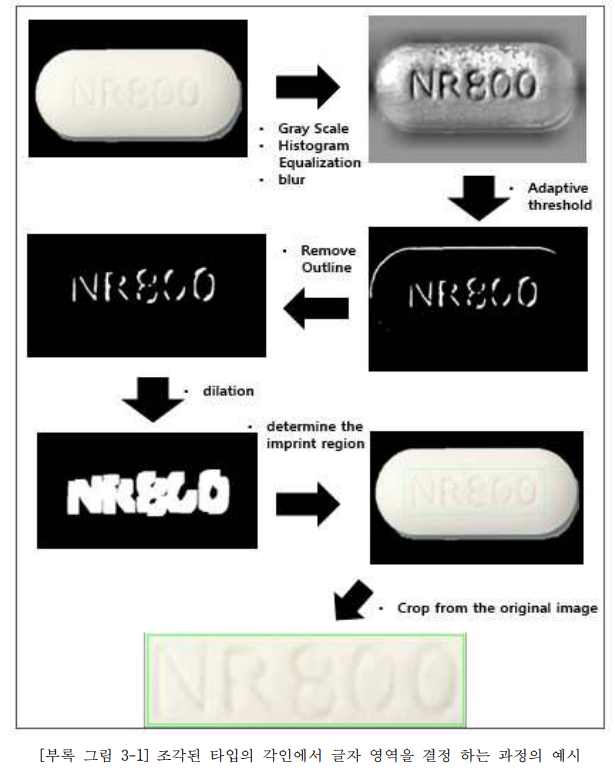

- 한계점: 심볼 형태나 독특한 글자체의 각인은 OCR로 인식하기 어려웠음

---

### 참조

성균관대 대학원 논문
(http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=b5c082324cf3b892ffe0bdc3ef48d419&outLink=K)
